In [1]:
import pandas as pd
import numpy as np
import hrvanalysis as hrv
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
from hrv.io import read_from_csv
from hrv.detrend import sg_detrend

# def read_and_detrend_hrv(file):
#     rri = read_from_csv(file)
#     new_rri = pd.DataFrame(rri.values)
#     new_rri.rename(columns={0:"RR"}, inplace=True)
#     rri_detrended = sg_detrend(rri, polyorder=3)
#     new_rri_detrended = pd.DataFrame(rri_detrended.values)
#     new_rri_detrended.rename(columns={0:"RR"}, inplace=True)
#     return new_rri_detrended
# df_nsr1, df_nsr1_detrended = read_and_detrend_hrv("chf201.txt_N.csv")
# data1, data2 = read_and_detrend_hrv("./data_update1/2.txt")
def read_and_detrend_hrv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            data.append(value)
    return data


data_array=[]
for i in range(2,47,1):
  if i == 33 or i == 32:
     continue
  file_path='./data_zdrowi/' + str(i)+ '.txt'
  data_array.append(read_and_detrend_hrv(file_path))
data_array_NN=[]
for i in range(len(data_array)):
  data_array_NN.append(hrv.get_nn_intervals(data_array[i],verbose= False))
  data_array_NN[i]= pd.DataFrame({'RR' : data_array_NN[i]})


data_array_heart=[]
for i in range(15,29,1):
   if i ==4 or i == 26 or i == 25 or i ==18 or i == 5 or i == 6 or i == 7 or  i == 8 or i == 22 or i == 23 or i ==28 or i ==12  or i==13 or i ==11 or i ==10:
       continue
   print(file_path)
   file_path='./data_zastoinowa_niewydolnosc_serca/rr'+ '.txt.'+str(i)
   data_array_heart.append(read_and_detrend_hrv(file_path))
NN_heart =[]
for i in range(len(data_array_heart)):
  NN_heart.append(hrv.get_nn_intervals(data_array_heart[i],verbose= False))
  NN_heart[i]= pd.DataFrame({'RR' : NN_heart[i]})



data_array_heart_failure=[]
for i in range(0,22,1):
   if i == 0:
     file_path='./data_nagla_smierc/rr'+ '.txt.'#str(i)
   else:
     file_path='./data_nagla_smierc/rr'+ '.txt.'+str(i)
   if i == 10 or i ==21 or i == 22 or i == 23:
    continue
   print(file_path)
   data_array_heart_failure.append(read_and_detrend_hrv(file_path))
NN_heart_F =[]
for i in range(len(data_array_heart_failure)):
  NN_heart_F.append(hrv.get_nn_intervals(data_array_heart_failure[i],verbose= False))
  NN_heart_F[i]= pd.DataFrame({'RR' : NN_heart_F[i]})


data_array_heart_AF=[]
for i in range(0,25,1):
   if i == 0:
     file_path='./data_migotanie/rr'+ '.txt.'#str(i)
   else:
     file_path='./data_migotanie/rr'+ '.txt.'+str(i)
   if i == 1 or i ==6 or i == 18 or i == 23:
    continue
   print(file_path)
   data_array_heart_AF.append(read_and_detrend_hrv(file_path))
NN_heart_AF =[]
for i in range(len(data_array_heart_AF)):
  NN_heart_AF.append(hrv.get_nn_intervals(data_array_heart_AF[i],verbose= False))
  NN_heart_AF[i]= pd.DataFrame({'RR' : NN_heart_AF[i]})

./data_zdrowi/46.txt
./data_zastoinowa_niewydolnosc_serca/rr.txt.15
./data_zastoinowa_niewydolnosc_serca/rr.txt.16
./data_zastoinowa_niewydolnosc_serca/rr.txt.17
./data_zastoinowa_niewydolnosc_serca/rr.txt.19
./data_zastoinowa_niewydolnosc_serca/rr.txt.20
./data_zastoinowa_niewydolnosc_serca/rr.txt.21
./data_zastoinowa_niewydolnosc_serca/rr.txt.24
./data_nagla_smierc/rr.txt.
./data_nagla_smierc/rr.txt.1
./data_nagla_smierc/rr.txt.2
./data_nagla_smierc/rr.txt.3
./data_nagla_smierc/rr.txt.4
./data_nagla_smierc/rr.txt.5
./data_nagla_smierc/rr.txt.6
./data_nagla_smierc/rr.txt.7
./data_nagla_smierc/rr.txt.8
./data_nagla_smierc/rr.txt.9
./data_nagla_smierc/rr.txt.11
./data_nagla_smierc/rr.txt.12
./data_nagla_smierc/rr.txt.13
./data_nagla_smierc/rr.txt.14
./data_nagla_smierc/rr.txt.15
./data_nagla_smierc/rr.txt.16
./data_nagla_smierc/rr.txt.17
./data_nagla_smierc/rr.txt.18
./data_nagla_smierc/rr.txt.19
./data_nagla_smierc/rr.txt.20
./data_migotanie/rr.txt.
./data_migotanie/rr.txt.2
./data_mig

In [2]:
def frequencydomain(rr:pd.DataFrame, show_plt):
    # Interpolating rr intervals series
    fs = 4.0 # sampling
    steps = 1/fs # lenght of the step
    x = np.arange(1,np.max(rr.index),steps)
    list = []
    for i in range(0,len(x)+1):
        if i % 4 == 0:
            list.append(rr['RR'][int(i/fs)])
        else:
            list.append(None)
    rr_interp = pd.DataFrame(list)
    rr_interp = rr_interp.interpolate(method='cubic')

    # Estimating the spectral density
    fxx, pxx = signal.welch(x=rr_interp[0], fs=fs)

    band_vlf = (fxx >= 0) & (fxx < 0.04) # very low frequency
    band_lf = (fxx >= 0.04) & (fxx < 0.15) # low frequency
    band_hf = (fxx >= 0.15) & (fxx < 0.4) # high frequency

    vlf_power = trapz(pxx[band_vlf], fxx[band_vlf])
    lf_power = trapz(pxx[band_lf], fxx[band_lf])
    hf_power = trapz(pxx[band_hf], fxx[band_hf])

    total_power = vlf_power + lf_power + hf_power
    lf_hf_ratio = lf_power / hf_power
    if show_plt:
        psd_f = interp1d(fxx,pxx)
        x_vlf = np.linspace(0,0.04,100)
        x_lf = np.linspace(0.04,0.15,100)
        x_hf = np.linspace(0.15,0.4,100)

        plt.figure(figsize=(20, 7))
        plt.plot(fxx, pxx)
        plt.gca().set_xlim(0, 0.5)
        plt.gca().fill_between(x_vlf, psd_f(x_vlf), alpha = 0.2, color = 'green', label = 'VLF')
        plt.gca().fill_between(x_lf, psd_f(x_lf), alpha = 0.2, color = 'yellow', label = 'LF')
        plt.gca().fill_between(x_hf, psd_f(x_hf), alpha = 0.2, color = 'red', label = 'HF')
        plt.title("FFT Spectrum (Welch's periodogram) ")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    return float(lf_power), float(hf_power), float(total_power), float(lf_hf_ratio)
    

Zdrowi  568.1612590167593 397.74373545832105 1451.992222161669 2.5209706332430786
CHF 1440.5271540062374 854.308476131016 3008.6249566388524 1.4204301396490568
Nagła smierć 3564.4055551886872 2446.0830611828296 7940.73510211656 1.4208445799563285
AF 2697.965916095048 1699.499148145699 5462.259239358287 1.1170033865038331


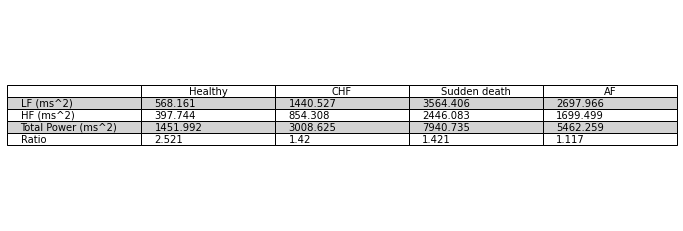

In [41]:
def count_elements_in_bins(data, bins):
    hist, _ = np.histogram(data, bins=np.append(bins, bins[-1]))
    return hist 
import math


import os 


lf_power_list=[]
hf_power_list=[]
total_power_list=[]
lf_hf_ratio_list=[]
for i in range(0,len(data_array_NN),1):
  lf_power_list.append(frequencydomain(data_array_NN[i],False)[0])
  hf_power_list.append(frequencydomain(data_array_NN[i],False)[1])
  total_power_list.append(frequencydomain(data_array_NN[i],False)[2])
  lf_hf_ratio_list.append(frequencydomain(data_array_NN[i],False)[3])
    

lf_data_array_heart=[]
hf_data_array_heart=[]
total_data_array_heart=[]
ratio_data_array_heart=[]
for i in range(0,len(NN_heart),1):
    lf_data_array_heart.append(frequencydomain(NN_heart[i],False)[0])
    hf_data_array_heart.append(frequencydomain(NN_heart[i],False)[1])
    total_data_array_heart.append(frequencydomain(NN_heart[i],False)[2])
    ratio_data_array_heart.append(frequencydomain(NN_heart[i],False)[3])

lf_power_list_heart_failure=[]
hf_power_list_heart_failure=[]
total_power_list_heart_failure=[]
lf_hf_ratio_list_heart_failure=[]
for i in range(0,len(NN_heart_F),1):
  lf_power_list_heart_failure.append(frequencydomain(NN_heart_F[i],False)[0])
  hf_power_list_heart_failure.append(frequencydomain(NN_heart_F[i],False)[1])
  total_power_list_heart_failure.append(frequencydomain(NN_heart_F[i],False)[2])
  lf_hf_ratio_list_heart_failure.append(frequencydomain(NN_heart_F[i],False)[3])
    
lf_data_array_heart_AF=[]
hf_data_array_heart_AF=[]
total_data_array_heart_AF=[]
ratio_data_array_heart_AF=[]
for i in range(0,len(NN_heart_AF),1):
    lf_data_array_heart_AF.append(frequencydomain(NN_heart_AF[i],False)[0])
    hf_data_array_heart_AF.append(frequencydomain(NN_heart_AF[i],False)[1])
    total_data_array_heart_AF.append(frequencydomain(NN_heart_AF[i],False)[2])
    ratio_data_array_heart_AF.append(frequencydomain(NN_heart_AF[i],False)[3])
    
total_power_list_heart_failure = [x for x in total_power_list_heart_failure if not math.isnan(x)]
lf_hf_ratio_list_heart_failure = [x for x in lf_hf_ratio_list_heart_failure if not math.isnan(x)]
lf_power_list_heart_failure = [x for x in lf_power_list_heart_failure if not math.isnan(x)]
hf_power_list_heart_failure = [x for x in hf_power_list_heart_failure if not math.isnan(x)]
  

print("Zdrowi ",np.mean(lf_power_list),np.mean(hf_power_list),np.mean(total_power_list),np.mean(lf_hf_ratio_list))
print("CHF",np.mean(lf_data_array_heart),np.mean(hf_data_array_heart),np.mean( total_data_array_heart),np.mean(ratio_data_array_heart))
print("Nagła smierć",np.mean(lf_power_list_heart_failure),np.mean(hf_power_list_heart_failure),np.mean(total_power_list_heart_failure),np.mean(lf_hf_ratio_list_heart_failure))
print("AF",np.mean(lf_data_array_heart_AF),np.mean(hf_data_array_heart_AF),np.mean(total_data_array_heart_AF),np.mean(ratio_data_array_heart_AF))


data = {
    "": [
        "LF (ms^2)",
        "HF (ms^2)",
        "Total Power (ms^2)" ,
        "Ratio"
    ],
    "Healthy": [
        round(np.mean(lf_power_list), 3),
        round(np.mean(hf_power_list), 3),
        round(np.mean(total_power_list), 3),
        round(np.mean(lf_hf_ratio_list), 3)
    ],
    "CHF": [
        round(np.mean(lf_data_array_heart), 3),
        round(np.mean(hf_data_array_heart), 3),
        round(np.mean(total_data_array_heart), 3),
        round(np.mean(ratio_data_array_heart), 3)
    ],
    "Sudden death": [
        round(np.mean(lf_power_list_heart_failure), 3),
        round(np.mean(hf_power_list_heart_failure), 3),
        round(np.mean(total_power_list_heart_failure), 3),
        round(np.mean(lf_hf_ratio_list_heart_failure), 3)
    ],
    "AF": [
        round(np.mean(lf_data_array_heart_AF), 3),
        round(np.mean(hf_data_array_heart_AF), 3),
        round(np.mean(total_data_array_heart_AF), 3),
        round(np.mean(ratio_data_array_heart_AF), 3)
    ]
}
df = pd.DataFrame(data)



from matplotlib.backends.backend_pdf import PdfPages

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
kolorowa_macierz = [['lightgray', 'lightgray' , 'lightgray', 'lightgray', 'lightgray'],
  ['white', 'white' , 'white', 'white' , 'white'],
  ['lightgray', 'lightgray' , 'lightgray', 'lightgray', 'lightgray'],
  ['white','white' , 'white', 'white', 'white']]
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center',cellColours=kolorowa_macierz, cellLoc= 'left' )
pp = PdfPages("table.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()


# LF POWER POCZATEK
# plt.figure(figsize=(16, 9))# Tworzenie histogramu
# bins=np.linspace(0,1200,11)
# bins=np.round(bins,2)


# lf_power_list1=count_elements_in_bins(lf_power_list, bins)
# lf_data_array_heart1=count_elements_in_bins(lf_data_array_heart, bins)
# lf_power_list_failure1= count_elements_in_bins(lf_power_list_heart_failure, bins)
# lf_data_array_heart_AF1= count_elements_in_bins(lf_data_array_heart_AF, bins)


# x_axis = np.arange(len(bins))# Rysuj słupki dla różnych kategorii

# plt.bar(x_axis+0.2,lf_power_list1, width=0.2, label='Zdrowi',edgecolor='black')
# plt.bar(x_axis+0.2*2, lf_data_array_heart1, width=0.2, color='red', label='Niewydolność serca', edgecolor='black')
# plt.bar(x_axis + 0.2*3, lf_power_list_failure1, width=0.2,  color='green', label='Nagła śmierć', edgecolor='black')
# plt.bar(x_axis + 0.2*4, lf_data_array_heart_AF1, width=0.2, color='c', label='Migotanie przedsionków', edgecolor='black')
# plt.ylabel('Liczba')
# plt.xticks(x_axis+0.1,bins)
# plt.legend()
# plt.title('Histogram Absolute power of the low-frequency band')
# plt.tight_layout()
# plt.savefig('Histogram_lf_power1.png')
# plt.show()
# LF KONIEC


# HF POCZATEK
# plt.figure(figsize=(16, 9))# Tworzenie histogramu
# bins=np.linspace(0,1200,11)
# bins=np.round(bins,2)

# hf_power_list2=count_elements_in_bins(hf_power_list, bins)
# hf_data_array_heart2=count_elements_in_bins(hf_data_array_heart, bins)
# hf_power_list_failure2= count_elements_in_bins(hf_power_list_heart_failure, bins)
# hf_data_array_heart_AF2= count_elements_in_bins(hf_data_array_heart_AF, bins)


# x_axis = np.arange(len(bins))# Rysuj słupki dla różnych kategorii

# plt.bar(x_axis+0.25,hf_power_list2, width=0.25, label='Zdrowi',edgecolor='black')
# plt.bar(x_axis+0.25*2, hf_data_array_heart2, width=0.25, color='red', label='Niewydolność serca', edgecolor='black')
# plt.bar(x_axis + 0.25*3, hf_power_list_failure2, width=0.25,  color='green', label='Nagła śmierć', edgecolor='black')
# plt.bar(x_axis + 0.25*4, hf_data_array_heart_AF2, width=0.25, color='c', label='Migotanie przedsionków', edgecolor='black')
# plt.ylabel('Liczba')
# plt.xticks(x_axis+0.1,bins)
# plt.legend()
# plt.title('Histogram Absolute power of the high-frequency band')
# plt.tight_layout()
# plt.savefig('Histogram_HF_power.png')
# plt.show()
# HF KONIEC


# TOTAL POWER POCZATEK
# plt.figure(figsize=(16, 9))# Tworzenie histogramu
# bins=np.linspace(0,4800,11)
# bins=np.round(bins,2)

# hf_power_list2=count_elements_in_bins(total_power_list, bins)
# hf_data_array_heart2=count_elements_in_bins(total_data_array_heart, bins)
# hf_power_list_failure2= count_elements_in_bins(total_power_list_heart_failure, bins)
# hf_data_array_heart_AF2= count_elements_in_bins(total_data_array_heart_AF, bins)


# x_axis = np.arange(len(bins))# Rysuj słupki dla różnych kategorii

# plt.bar(x_axis+0.25,hf_power_list2, width=0.25, label='Zdrowi',edgecolor='black')
# plt.bar(x_axis+0.25*2, hf_data_array_heart2, width=0.25, color='red', label='Niewydolność serca', edgecolor='black')
# plt.bar(x_axis + 0.25*3, hf_power_list_failure2, width=0.25,  color='green', label='Nagła śmierć', edgecolor='black')
# plt.bar(x_axis + 0.25*4, hf_data_array_heart_AF2, width=0.25, color='c', label='Migotanie przedsionków', edgecolor='black')
# plt.ylabel('Liczba')
# plt.xticks(x_axis+0.1,bins)
# plt.legend()
# plt.title('Histogram Total power')
# plt.tight_layout()
# plt.savefig('Histogram_total_power.png')
# plt.show()
# TOTAL POWER KONIEC


# RATIO POCZATEK
# plt.figure(figsize=(16, 9))# Tworzenie histogramu
# bins=np.linspace(0,3,11)
# bins=np.round(bins,2)

# hf_power_list2=count_elements_in_bins(lf_hf_ratio_list, bins)
# hf_data_array_heart2=count_elements_in_bins(ratio_data_array_heart, bins)
# hf_power_list_failure2= count_elements_in_bins(lf_hf_ratio_list_heart_failure, bins)
# hf_data_array_heart_AF2= count_elements_in_bins(ratio_data_array_heart_AF, bins)


# x_axis = np.arange(len(bins))# Rysuj słupki dla różnych kategorii

# plt.bar(x_axis+0.25,hf_power_list2, width=0.25, label='Zdrowi',edgecolor='black')
# plt.bar(x_axis+0.25*2, hf_data_array_heart2, width=0.25, color='red', label='Niewydolność serca', edgecolor='black')
# plt.bar(x_axis + 0.25*3, hf_power_list_failure2, width=0.25,  color='green', label='Nagła śmierć', edgecolor='black')
# plt.bar(x_axis + 0.25*4, hf_data_array_heart_AF2, width=0.25, color='c', label='Migotanie przedsionków', edgecolor='black')
# plt.ylabel('Liczba')
# plt.xticks(x_axis+0.1,bins)
# plt.legend()
# plt.title('Histogram LF/HL RATIO')
# plt.tight_layout()
# plt.savefig('Histogram_RATIO.png')
# plt.show()
# RATIO KONIEC


In [57]:
pip install hrv-analysis


In [58]:
pip install fpdf2

  Using cached fonttools-4.42.1-cp39-cp39-win_amd64.whl (2.1 MB)
  Attempting uninstall: fonttools
    Found existing installation: fonttools 4.25.0
    Uninstalling fonttools-4.25.0:
      Successfully uninstalled fonttools-4.25.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install weasyprint

  Using cached Pillow-10.0.1-cp39-cp39-win_amd64.whl (2.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0



SyntaxError: invalid syntax (Temp/ipykernel_36088/974564793.py, line 1)